In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer

#### Design the device (circuit in QC jargon) that would generate your lucky number

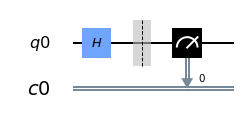

In [6]:
# Number of qubits utilised simultaneously.
glo_num_qubits = 1

def create_circuit(num_target_qubits: int) -> QuantumCircuit:
    """
    Creates and returns quantum circuit for random variate generation.
    :param num_target_qubits: number of qubits to be used.
    :return: quantum curcuit.
    """
    assert isinstance(num_target_qubits, int) and num_target_qubits > 0
    q = QuantumRegister(num_target_qubits)
    c = ClassicalRegister(num_target_qubits)
    circuit = QuantumCircuit(q, c)
    circuit.h(q)
    circuit.barrier()
    circuit.measure(q, c)
    return circuit

# Create and plot generating quantum circuit.
circuit = create_circuit(glo_num_qubits)
#print(circuit)
circuit.draw(output='mpl')

#### First try it on a simulator (simulates QC on a not-QC)
##### Not necessary, but, my boss says I should have a unit test for every line of code I write

In [10]:
# First try it on a simulator
# In this example we use 'qasm_simulator' backend.
glo_backend = BasicAer.get_backend("qasm_simulator")

# Create a Quantum Program for execution 
job_sim = execute(circuit, glo_backend, shots=8, memory=True)

bit_str = ''.join(job_sim.result().get_memory())
int(bit_str,2)

59

#### Next do it on the real QC (IBMQ) 
##### You can obtain a free token after you register at IBMQ site

In [12]:
from qiskit import IBMQ
#IBMQ.save_account('GET_AND_PASTE_YOUR_IBMQ_TOKEN_HERE')
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [18]:
# Next, do it on the real thing.
# Find the least-busy IBM device
from qiskit.providers.ibmq import least_busy
lb_device = least_busy(provider.backends(filters=lambda b: b.configuration().simulator == False))

# And run the circuit on that device
job = execute(circuit, backend=lb_device, shots=8, memory=True)
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()


bit_str = ''.join(result.get_memory())
print("Your lucky number is ",int(bit_str,2))

Job Status: job has successfully run
Your lucky number is  159


In [21]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright